<a href="https://colab.research.google.com/github/flavianacif/DSWP/blob/master/Exercicio_Atletas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df_atletas = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/athlete_events.csv')

In [6]:
df_noc = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/noc_regions.csv')

In [7]:
!pip install category_encoders
!pip install update
import category_encoders as ce
from sklearn import preprocessing

     |████████████████████████████████| 81kB 2.2MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
df_atletas.columns = df_atletas.columns.str.lower()
df_noc.columns = df_noc.columns.str.lower()

In [10]:
df_atletas = df_atletas.set_index('id')
df_noc = df_noc.set_index('noc')

In [12]:
df_atletas['medal'][df_atletas['medal'].isna()]

id
1         NaN
2         NaN
3         NaN
5         NaN
5         NaN
         ... 
135569    NaN
135570    NaN
135570    NaN
135571    NaN
135571    NaN
Name: medal, Length: 231333, dtype: object

In [15]:
df_atletas['medal'] = df_atletas['medal'].fillna('No_Medals')

In [16]:
df_atletas['medal']

id
1         No_Medals
2         No_Medals
3         No_Medals
4              Gold
5         No_Medals
            ...    
135569    No_Medals
135570    No_Medals
135570    No_Medals
135571    No_Medals
135571    No_Medals
Name: medal, Length: 271116, dtype: object

In [18]:
le = preprocessing.LabelEncoder()
l_var = ['sex','season','team','city','sport','medal']
s_var_num = []
for y in l_var:
    s_var_num = y + '_num'
    #df_atletas[s_var_num] = imp.fit_transform(df_atletas[y])
    df_atletas[s_var_num] = df_atletas[y].replace()
    #print(df_atletas[y])
    #df_atletas[s_var_num] = 
    df_atletas[s_var_num] = le.fit_transform(df_atletas[s_var_num])
df_atletas.head()

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,sex_num,season_num,team_num,city_num,sport_num,medal_num
id,,,,,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medals,1,0,198,5,8,2
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medals,1,0,198,17,32,2
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No_Medals,1,0,273,2,24,2
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1,0,278,26,61,1
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No_Medals,0,1,704,8,53,2


In [23]:
df_atletas[['height_notna','weight_notna']] = df_atletas[['height','weight']].fillna(df_atletas[['height','weight']].mean()) 

In [25]:
df_atletas.head(2)

,name,sex,age,height,weight,team,noc,games,year,season,city,sport,event,medal,sex_num,season_num,team_num,city_num,sport_num,medal_num,height_notna,weight_notna
id,,,,,,,,,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No_Medals,1,0,198,5,8,2,180.0,80.0
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No_Medals,1,0,198,17,32,2,170.0,60.0


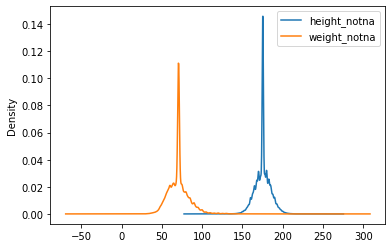

In [47]:
df_atletas[['height_notna','weight_notna']].plot(kind = 'kde')

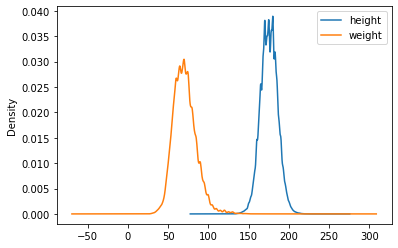

In [48]:
df_atletas[['height','weight']].plot(kind = 'kde')

Aplicando as Transformações

In [26]:
from sklearn.preprocessing import StandardScaler

In [36]:
df_atletas[['height_std','weight_std']] = StandardScaler().fit_transform(df_atletas[['height_notna','weight_notna']]) # Combinação dos métodos fit() + transform()

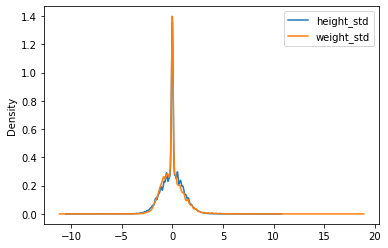

In [49]:
df_atletas[['height_std','weight_std']].plot(kind = 'kde')

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
df_atletas[['height_mmax','weight_mmax']] = MinMaxScaler().fit_transform(df_atletas[['height_notna','weight_notna']]) 
df_atletas[['height_mmax','weight_mmax']].head()

,height_mmax,weight_mmax
id,,
1,0.535354,0.291005
2,0.434343,0.185185
3,0.488272,0.241812
4,0.488272,0.241812
5,0.585859,0.301587


In [41]:
from sklearn.preprocessing import RobustScaler

In [42]:
df_atletas[['height_rob','weight_rob']] = RobustScaler().fit_transform(df_atletas[['height_notna','weight_notna']]) 
df_atletas[['height_rob','weight_rob']]

,height_rob,weight_rob
id,,
1,0.466103,0.774801
2,-0.533897,-0.891866
3,0.000000,0.000000
4,0.000000,0.000000
5,0.966103,0.941467
...,...,...
135569,0.366103,1.524801
135570,0.066103,-0.975199
135570,0.066103,-0.975199
